In [3]:
import os

# Groq (model provider)
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

# Search API keys
os.environ["TAVILY_API_KEY"] = os.getenv("TAVILY_API_KEY")
os.environ["SERPER_API_KEY"] = os.getenv("SERPER_API_KEY")

print("Keys set!")

Keys set!


In [4]:
from langchain.chat_models import init_chat_model

# Use Groq LLM
model = init_chat_model(
    model="groq:llama-3.3-70b-versatile",  # Large model for tool calling
    temperature=0.3
)

print("LLM initialized:", model)

LLM initialized: profile={'max_input_tokens': 131072, 'max_output_tokens': 32768, 'image_inputs': False, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': False, 'tool_calling': True} client=<groq.resources.chat.completions.Completions object at 0x000001DF8A69DC10> async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x000001DF8A8165D0> model_name='llama-3.3-70b-versatile' temperature=0.3 model_kwargs={} groq_api_key=SecretStr('**********')


In [5]:
from langchain_tavily import TavilySearch

tavily_search = TavilySearch(
    max_results=5,
    topic="general"
)

print("Tavily search tool ready")

Tavily search tool ready


In [6]:
from langchain_community.utilities import GoogleSerperAPIWrapper

google_search = GoogleSerperAPIWrapper()

print("Google Serper wrapper ready")

Google Serper wrapper ready


In [7]:
result = google_search.run("Astrology proof")
print("Google Serper raw:", result)

Google Serper raw: Scientists may say astrology is a psuedo science with concepts and theories that cannot be proven without scientific proof but if you are able ... by S Quaglia · Cited by 1 — The answer, in short, is no. There is no scientific backing to the conclusions drawn by astrology. But there are many ways that astrology is connected with the ... Although astrology has no scientific validity, astrological beliefs have impacted human history and astrology has helped to drive the development of astronomy. In some ways, astrology may seem scientific. It uses scientific knowledge about heavenly bodies, as well as scientific sounding tools, like star charts. There is no scientific evidence for astrology. That is simply not true. There's actually plenty of evidence for it. Dr. Brian Keating and Dr. Andrew Huberman discuss astrology, some fun facts about the cosmology of the zodiac, and why horoscopes are not ... There isn't a single piece of evidence that scientifically proves astro

In [8]:
tavily_search.invoke({"query": "What happened at the last wimbledon"})

{'query': 'What happened at the last wimbledon',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://www.atptour.com/en/news/wimbledon-2025-results',
   'title': 'What were the Wimbledon results? | ATP Tour | Tennis',
   'content': "# ATP Tour. #### TOURNAMENT RESULTS. #### PLAYER RESULTS. ## What were the Wimbledon results? Jannik Sinner sank his great rival Carlos Alcaraz on Sunday evening at Wimbledon to become the first Italian to lift a singles trophy at the grass major. **Read More from Wimbledon:**  Sinner gains Alcaraz revenge, wins first Wimbledon crown. Sinner claws closer to Alcaraz in Big Titles chase with Wimbledon triumph. ### Read More News View All News. * {{player.ranking}} Rank {{opponent.ranking}}. player.Age : '-'}} Age {{opponent.Age ? * {{getWeightInLB.player}} Weight {{getWeightInLB.opponent}}. * {{getHeightInFeetInch.player}} Height {{getHeightInFeetInch.opponent}}. * {{getPlayHand.player}} Plays {{getPlayHand.opponent}}. 

In [9]:
from langchain_core.tools import Tool 


def tavily_search_tool(query: str) -> str:
    """
    Search the web using Tavily for travel info, tips, attractions, etc.
    """
    # Call the existing TavilySearch tool underneath
    return tavily_search.invoke({"query": query})


def google_serper_search_tool(query: str) -> str:
    """
    Search the web using Google Serper for up-to-date travel info.
    """
    return google_search.run(query)

In [10]:
tavily_search_tool("Plan a trip to North Iran")

{'query': 'Plan a trip to North Iran',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://www.facebook.com/groups/634051570138386/posts/2843085112568343/',
   'title': 'Traveling to northern Iran in December',
   'content': 'Hi, I am planning a trip to Iran in March 2025. I would like to travel to Isfahan and shiraz. Can anyone suggest a good itinerary for both the',
   'score': 0.6862234,
   'raw_content': None},
  {'url': 'https://www.iranexploration.com/holiday-types/iran-cultural-discovery-tours/7-day-caspian-sea-tour/',
   'title': 'A 7-Day Iran Tour on Caspian Sea Green Line',
   'content': "This tour takes you through North Iran's most vibrant cities, including Tehran, Namak Abrood, Ramsar, Lahijan, Rasht, and Masouleh, Bandar-e Anzali, Qazvin.",
   'score': 0.6504012,
   'raw_content': None},
  {'url': 'https://www.iraniantours.com/tour/nt7/',
   'title': 'NT7 : North Iran in one week | Iran Tour and Travel with ...',
   'content': 'A we

In [11]:
# testing the funcitonality 

google_serper_search_tool("Plan a 5 trip to azerbaijan")

"You can see most of the city in 1.5-2 days. If you plan to do day trips, then factor in additional 1-2 days. The architecture of Baku rivals ... Things to do in Azerbaijan; A 5 Day Azerbaijan Itinerary · Day 1 on your Azerbaijan itinerary: Baku Old City, UNESCO World Heritage Site · Day 2 on your ... Day 1: Arrival and Baku City Exploration Explore Baku city: Day 2: Shahdag Adventure Day 3: Candy Cane Mountains, Shamakhi, Lahij, and Transfer to Gabala Fire Temple •Yanardag fire mountain •Qobustan rock mountain •Qobustan museum •Heydar aliyev center City Tour - Baku I had my city tour in the ... Here is our itinerary ... 1st Jan : roam around Baku. Highland park, nizami street. Little venice. Baku boulevard ... 2nd Jan : Day tour to shahdag ... For a 5-day Azerbaijan itinerary, you can explore the key highlights of the country. Start with 2-3 days in Baku, visiting the Baku Old City, ... Create the getaway you've always wished for with a customized Azerbaijan vacation package. Get read

Travel agent ready!


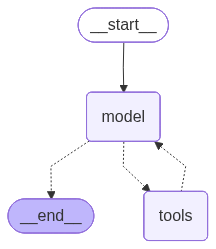

In [12]:
from langchain.agents import create_agent

system_prompt = """
You are a travel planner assistant. User asks travel queries like
'plan my trip to X', 'what to do in Y hotel', etc.
Always use the available web search tools (TavilySearch, GoogleSerperSearch)
to look up latest real-world travel info. Provide a helpful and clear itinerary/answers.
"""

agent = create_agent(
    model = model,
    tools = [tavily_search_tool, google_serper_search_tool],
    system_prompt = system_prompt.strip()
)
print("Travel agent ready!")
agent

In [13]:
response = agent.invoke({
    "messages": [
        {"role": "user", "content": "Plan a 7-day trip to Japan in April"}
    ]
})
print("Agent response:", response)

Agent response: {'messages': [HumanMessage(content='Plan a 7-day trip to Japan in April', additional_kwargs={}, response_metadata={}, id='6a56713e-d35c-49e4-96f5-a82e1dfba5cf'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '3q5t18dda', 'function': {'arguments': '{"query":"Japan travel guide April"}', 'name': 'tavily_search_tool'}, 'type': 'function'}, {'id': 's8mcvqj5y', 'function': {'arguments': '{"query":"Japan weather in April"}', 'name': 'google_serper_search_tool'}, 'type': 'function'}, {'id': 'd62j3ctwv', 'function': {'arguments': '{"query":"top attractions in Japan for 7-day trip"}', 'name': 'tavily_search_tool'}, 'type': 'function'}, {'id': 'a6e86yk6h', 'function': {'arguments': '{"query":"Japan festival and events in April"}', 'name': 'google_serper_search_tool'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 86, 'prompt_tokens': 385, 'total_tokens': 471, 'completion_time': 0.228435963, 'completion_tokens_details': None, 'prom

In [14]:
response["messages"]

[HumanMessage(content='Plan a 7-day trip to Japan in April', additional_kwargs={}, response_metadata={}, id='6a56713e-d35c-49e4-96f5-a82e1dfba5cf'),
 AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '3q5t18dda', 'function': {'arguments': '{"query":"Japan travel guide April"}', 'name': 'tavily_search_tool'}, 'type': 'function'}, {'id': 's8mcvqj5y', 'function': {'arguments': '{"query":"Japan weather in April"}', 'name': 'google_serper_search_tool'}, 'type': 'function'}, {'id': 'd62j3ctwv', 'function': {'arguments': '{"query":"top attractions in Japan for 7-day trip"}', 'name': 'tavily_search_tool'}, 'type': 'function'}, {'id': 'a6e86yk6h', 'function': {'arguments': '{"query":"Japan festival and events in April"}', 'name': 'google_serper_search_tool'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 86, 'prompt_tokens': 385, 'total_tokens': 471, 'completion_time': 0.228435963, 'completion_tokens_details': None, 'prompt_time': 0.019638884, 'prom

In [15]:
final_answer = response["messages"][-1].content
print("Final answer:", final_answer)

Final answer: Here's a 7-day trip plan to Japan in April:

Day 1: Arrival in Osaka
- Arrive at Kansai International Airport
- Check-in to a hotel in the Namba area
- Explore the Dotonbori district for dinner, bars, and drinks

Day 2: Osaka
- Visit the Osaka Castle
- Explore the Umeda Sky Building for panoramic views of the city
- Enjoy the nightlife in the Shinsaibashi area

Day 3: Kyoto
- Travel to Kyoto by train
- Visit the Kiyomizu-dera Temple
- Explore the Gion district and enjoy a traditional Japanese dinner

Day 4: Kyoto
- Visit the Fushimi Inari Shrine
- Explore the Arashiyama Bamboo Forest
- Enjoy a traditional Japanese tea ceremony

Day 5: Tokyo
- Travel to Tokyo by train
- Visit the Meiji Shrine
- Explore the Shibuya Crossing and enjoy the nightlife in the area

Day 6: Tokyo
- Visit the Tokyo Skytree for panoramic views of the city
- Explore the Asakusa district and visit the Senso-ji Temple
- Enjoy a sumo wrestling tournament at the Ryogoku Kokugikan

Day 7: Tokyo
- Visit th